# PHÂN LOẠI NẤM

# Python libraries

In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.model_selection import cross_val_predict, cross_val_score

# Đọc và phân tích bộ dữ liệu

In [66]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [68]:
df = pd.read_csv('/content/drive/MyDrive/Mushroom_Classification/source_code/data/mushrooms.csv')

In [4]:
#Hiển thị thuộc tính các cột trong data
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
#Hiển thị 5 hàng đầu tiên của data
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [6]:
print("Dữ liệu gốc:", df.shape)

Dữ liệu gốc: (8124, 23)


In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


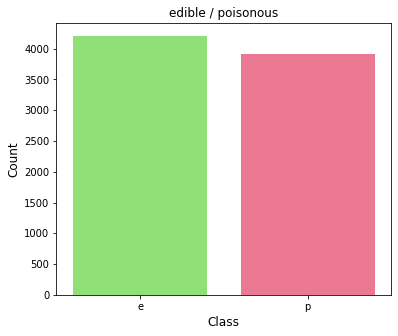

In [8]:
#Visualize mô hình đếm số lượng nấm ăn được và không ăn được trong data
count = df['class'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('edible / poisonous')
#plt.savefig("count_class.jpeg", format='jpeg', dpi=100)
plt.show()

Nhận xét: Nhìn vào biểu đồ trên, chúng ta nhận thấy tập dữ liệu này cân bằng

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


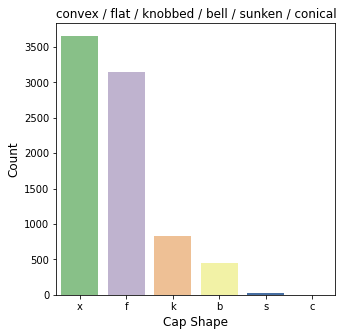

In [9]:
#Visualize mô hình đếm số lượng 
count = df['cap-shape'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(5,5))
sns.barplot(count.index, count.values, alpha=1, palette="Accent")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Cap Shape', fontsize=12)
plt.title('convex / flat / knobbed / bell / sunken / conical')
#plt.savefig("count_cap_shape.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


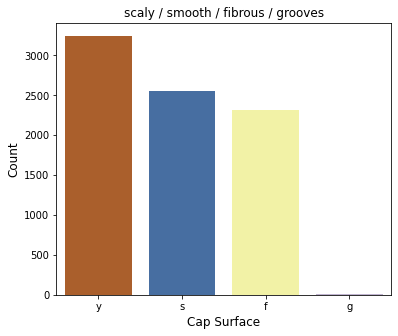

In [10]:
#Visualize mô hình đếm số lượng 
count = df['cap-surface'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=1, palette="Accent_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Cap Surface', fontsize=12)
plt.title('scaly / smooth / fibrous / grooves')
#plt.savefig("count_cap_surface.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


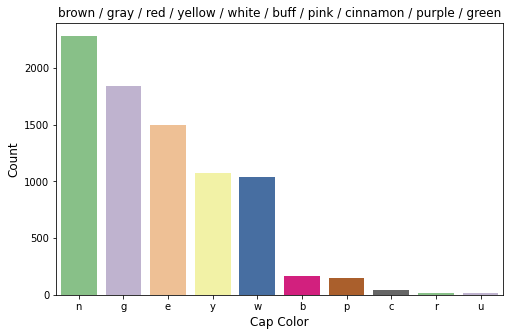

In [11]:
#Visualize mô hình đếm số lượng 
count = df['cap-color'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(8,5))
sns.barplot(count.index, count.values, alpha=1, palette="Accent")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Cap Color', fontsize=12)
plt.title('brown / gray / red / yellow / white / buff / pink / cinnamon / purple / green')
#plt.savefig("count_cap_color.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


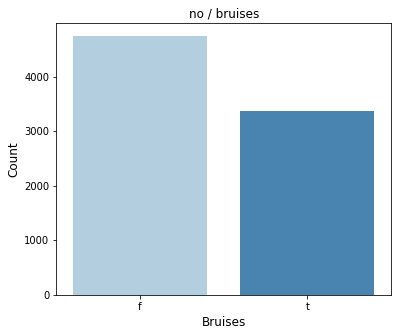

In [12]:
#Visualize mô hình đếm số lượng 
count = df['bruises'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=1, palette="Blues")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bruises', fontsize=12)
plt.title('no / bruises')
#plt.savefig("count_bruises.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


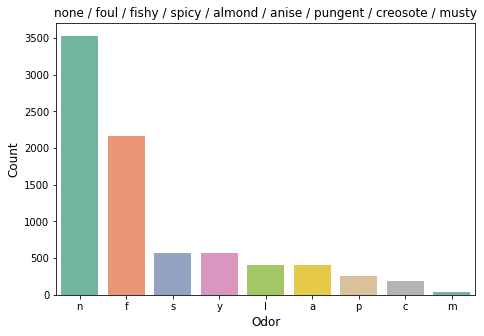

In [13]:
#Visualize mô hình đếm số lượng 
count = df['odor'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(7.5,5))
sns.barplot(count.index, count.values, alpha=1, palette="Set2")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Odor', fontsize=12)
plt.title('none / foul / fishy / spicy / almond / anise / pungent / creosote / musty')
#plt.savefig("count_odor.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


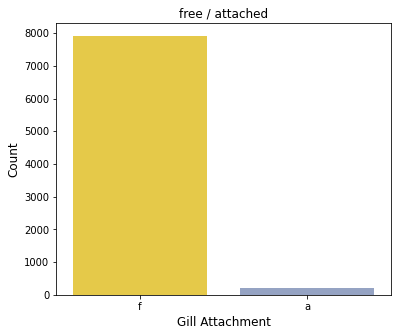

In [14]:
#Visualize mô hình đếm số lượng 
count = df['gill-attachment'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=1, palette="Set2_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gill Attachment', fontsize=12)
plt.title('free / attached')
#plt.savefig("count_gill_attachment.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


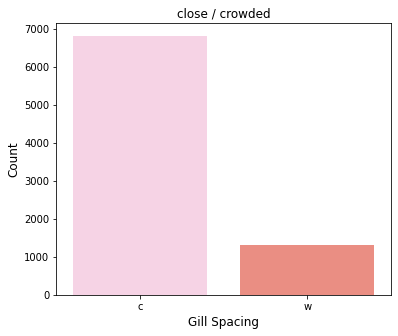

In [15]:
#Visualize mô hình đếm số lượng 
count = df['gill-spacing'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=1, palette="Set3_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gill Spacing', fontsize=12)
plt.title('close / crowded')
#plt.savefig("count_gill_spacing.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


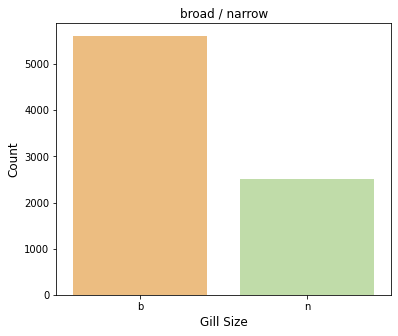

In [16]:
#Visualize mô hình đếm số lượng 
count = df['gill-size'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=1, palette="Spectral")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gill Size', fontsize=12)
plt.title('broad / narrow')
#plt.savefig("count_gill_size.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


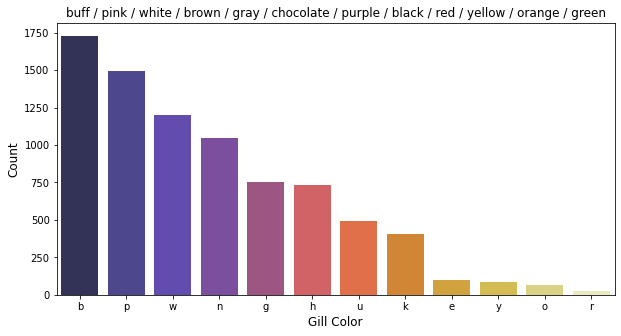

In [17]:
#Visualize mô hình đếm số lượng 
count = df['gill-color'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(10,5))
sns.barplot(count.index, count.values, alpha=0.9, palette="CMRmap")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gill Color', fontsize=12)
plt.title('buff / pink / white / brown / gray / chocolate / purple / black / red / yellow / orange / green')
#plt.savefig("count_gill_color.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


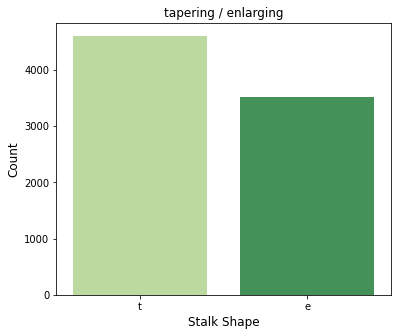

In [18]:
#Visualize mô hình đếm số lượng 
count = df['stalk-shape'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=1, palette="YlGn")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Stalk Shape', fontsize=12)
plt.title('tapering / enlarging')
#plt.savefig("count_stalk_shape.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


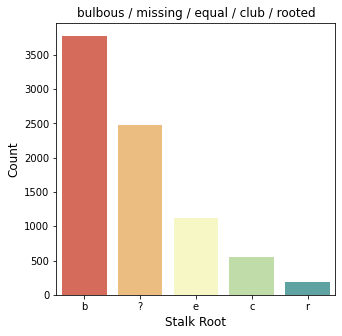

In [19]:
#Visualize mô hình đếm số lượng 
count = df['stalk-root'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(5,5))
sns.barplot(count.index, count.values, alpha=1, palette="Spectral")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Stalk Root', fontsize=12)
plt.title('bulbous / missing / equal / club / rooted')
#plt.savefig("count_stalk_root.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


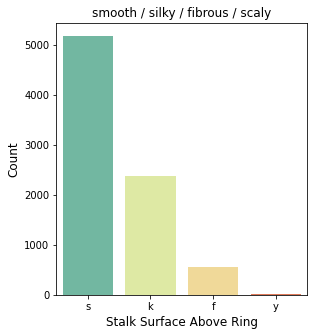

In [20]:
#Visualize mô hình đếm số lượng 
count = df['stalk-surface-above-ring'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(4.5,5))
sns.barplot(count.index, count.values, alpha=1, palette="Spectral_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Stalk Surface Above Ring', fontsize=12)
plt.title('smooth / silky / fibrous / scaly')
#plt.savefig("count_stalk_surface_above_ring.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


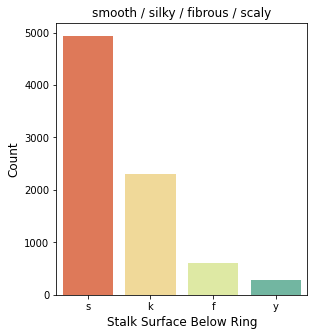

In [21]:
#Visualize mô hình đếm số lượng 
count = df['stalk-surface-below-ring'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(4.5,5))
sns.barplot(count.index, count.values, alpha=1, palette="Spectral")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Stalk Surface Below Ring', fontsize=12)
plt.title('smooth / silky / fibrous / scaly')
#plt.savefig("count_stalk_surface_below_ring.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


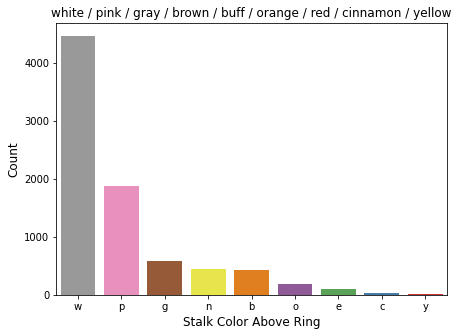

In [22]:
#Visualize mô hình đếm số lượng 
count = df['stalk-color-above-ring'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(7,5))
sns.barplot(count.index, count.values, alpha=1, palette="Set1_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Stalk Color Above Ring', fontsize=12)
plt.title('white / pink / gray / brown / buff / orange / red / cinnamon / yellow')
#plt.savefig("count_stalk_color_above_ring.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


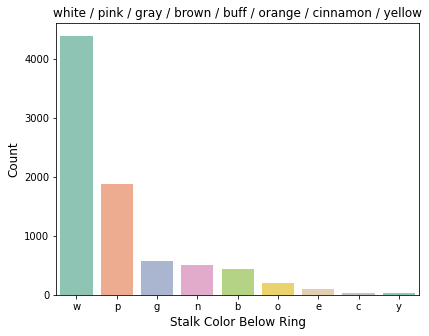

In [23]:
#Visualize mô hình đếm số lượng 
count = df['stalk-color-below-ring'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6.5,5))
sns.barplot(count.index, count.values, alpha=0.8, palette="Set2")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Stalk Color Below Ring', fontsize=12)
plt.title('white / pink / gray / brown / buff / orange / cinnamon / yellow')
#plt.savefig("count_stalk_color_below_ring.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


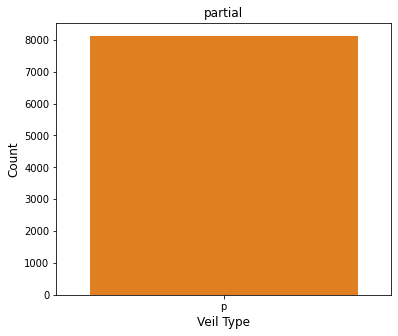

In [24]:
#Visualize mô hình đếm số lượng 
count = df['veil-type'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=1, palette="Set1_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Veil Type', fontsize=12)
plt.title('partial')
#plt.savefig("count_veil_type.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


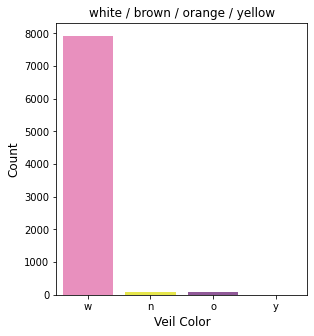

In [25]:
#Visualize mô hình đếm số lượng 
count = df['veil-color'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(4.5,5))
sns.barplot(count.index, count.values, alpha=1, palette="Set1_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Veil Color', fontsize=12)
plt.title('white / brown / orange / yellow')
#plt.savefig("count_veil_color.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


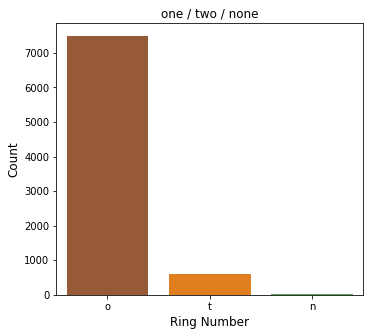

In [26]:
#Visualize mô hình đếm số lượng 
count = df['ring-number'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(5.5,5))
sns.barplot(count.index, count.values, alpha=1, palette="Set1_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Ring Number', fontsize=12)
plt.title('one / two / none')
#plt.savefig("count_ring_number.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


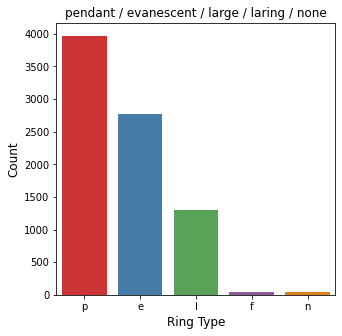

In [27]:
#Visualize mô hình đếm số lượng 
count = df['ring-type'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(5,5))
sns.barplot(count.index, count.values, alpha=1, palette="Set1")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Ring Type', fontsize=12)
plt.title('pendant / evanescent / large / laring / none')
#plt.savefig("count_ring_type.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


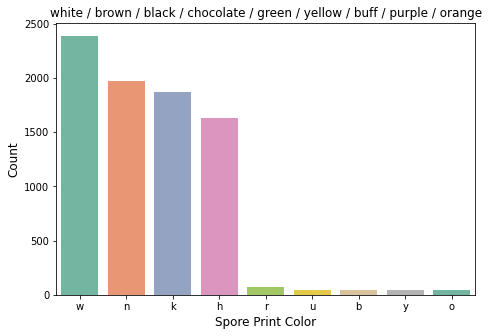

In [28]:
#Visualize mô hình đếm số lượng 
count = df['spore-print-color'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(7.5,5))
sns.barplot(count.index, count.values, alpha=1, palette="Set2")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Spore Print Color', fontsize=12)
plt.title('white / brown / black / chocolate / green / yellow / buff / purple / orange')
#plt.savefig("count_spore_print_color.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


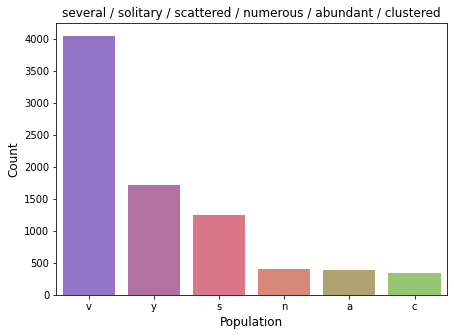

In [29]:
#Visualize mô hình đếm số lượng 
count = df['population'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(7,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="brg")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Population', fontsize=12)
plt.title('several / solitary / scattered / numerous / abundant / clustered')
#plt.savefig("count_population.jpeg", format='jpeg', dpi=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


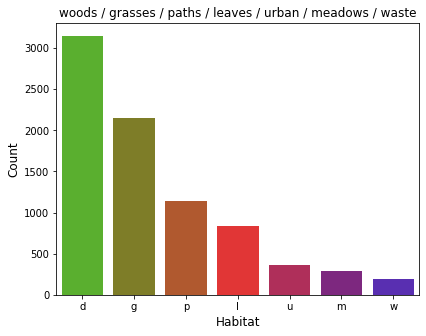

In [30]:
#Visualize mô hình đếm số lượng 
count = df['habitat'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6.5,5))
sns.barplot(count.index, count.values, alpha=0.9, palette="brg_r")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Habitat', fontsize=12)
plt.title('woods / grasses / paths / leaves / urban / meadows / waste')
#plt.savefig("count_habitat.jpeg", format='jpeg', dpi=100)
plt.show()

Dữ liệu mang tính phân loại vì vậy chúng ta chuyển đổi nó bằng Bộ mã hóa nhãn LabelEncoder() để chuyển sang số.

In [69]:
#Mã hóa nhãn (chuyển đổi dữ liệu chữ thành số)
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [70]:
#Mã hóa nhãn (chuyển đổi dữ liệu chữ thành số)
mappings = list()
encoder = LabelEncoder()
for column in range(len(df.columns)):
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [71]:
#Biến đổi chữ thành số tương ứng
mappings

[{0: 0, 1: 1},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
 {0: 0, 1: 1, 2: 2, 3: 3},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9},
 {0: 0, 1: 1},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11},
 {0: 0, 1: 1},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 {0: 0, 1: 1, 2: 2, 3: 3},
 {0: 0, 1: 1, 2: 2, 3: 3},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8},
 {0: 0},
 {0: 0, 1: 1, 2: 2, 3: 3},
 {0: 0, 1: 1, 2: 2},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
 {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}]

In [34]:
#Xem số liệu sau khi mã hóa data
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [35]:
df.head()
#df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [36]:
#Kiểm tra cột veil-type
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int64

Nhìn vào các bảng số liệu trên có thể thấy rằng cột "veil-type" bằng 0 và không đóng góp vào việc phân loại dữ liệu nên chúng ta có thể loại bỏ nó.

In [72]:
#Loại bỏ cột veil-type khỏi tập dữ liệu đang xét
df=df.drop(["veil-type"],axis=1)

Biểu đồ violin dưới đây thể hiện sự phân bố của các đặc điểm phân loại. Có thể thấy đặc tính "gill-color" của nấm chia làm hai phần, 3 trên và 3 dưới, có thể góp phần vào việc phân loại.

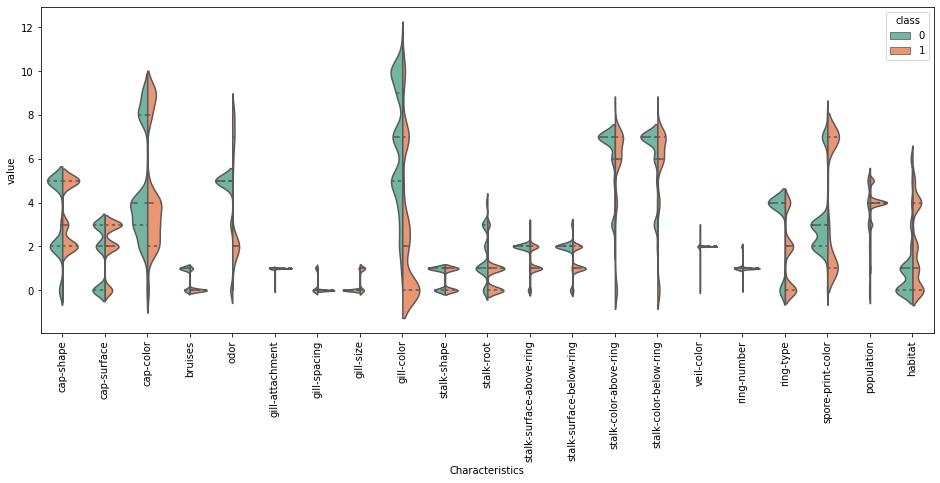

In [38]:
#Visualize biểu đồ Violin
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set2')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
#plt.savefig("violinplot.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

Xét mối tương quan giữa các biến:

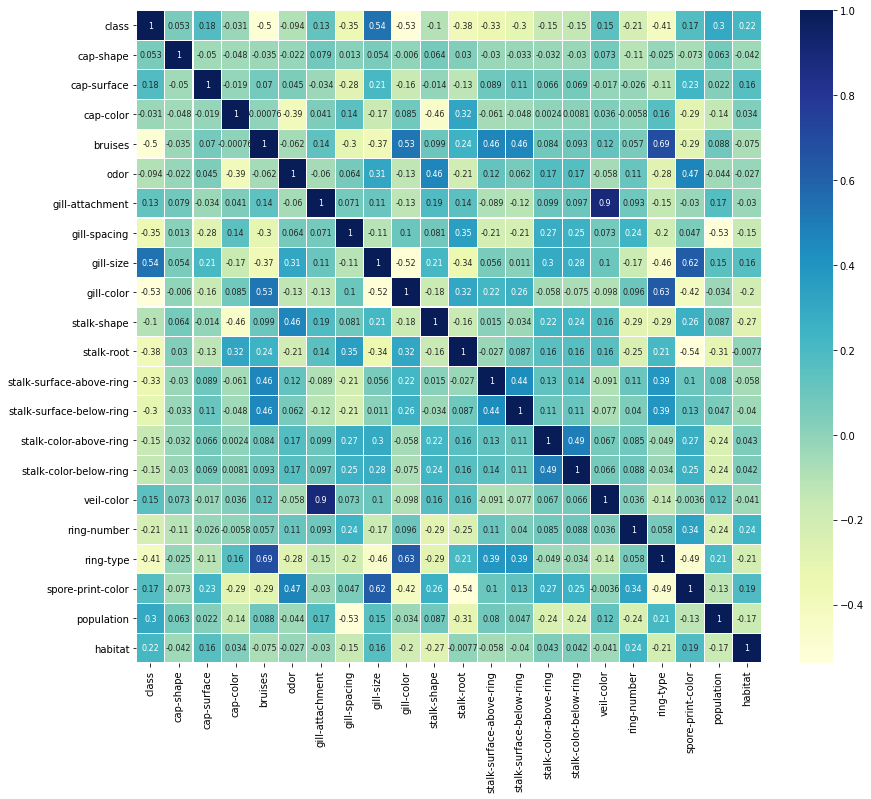

In [39]:
#Visualize mô hình thể hiện mối tương quan giữa các thuộc tính
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

Nhận xét: Thông thường biến ít tương quan nhất là biến quan trọng nhất để phân loại. Trong trường hợp này, "gill-color" = -0,53. Vì vậy chúng ta hãy xem xét kỹ nó:

In [40]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


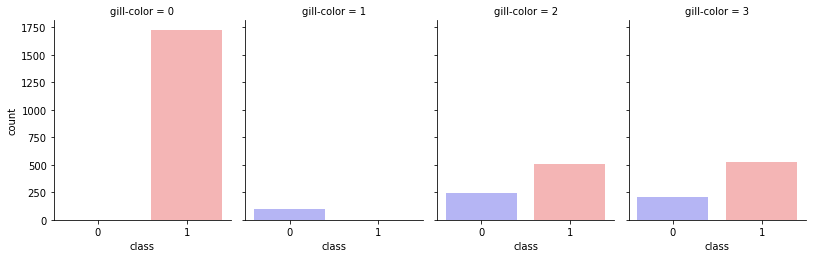

In [41]:
#Visualize thuộc tính "gill-color" trong bảng trên bằng biểu đồ
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=3.5, aspect=.8, col_wrap=4,palette="bwr");
#plt.savefig("gillcolor1.png", format='png', dpi=100, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


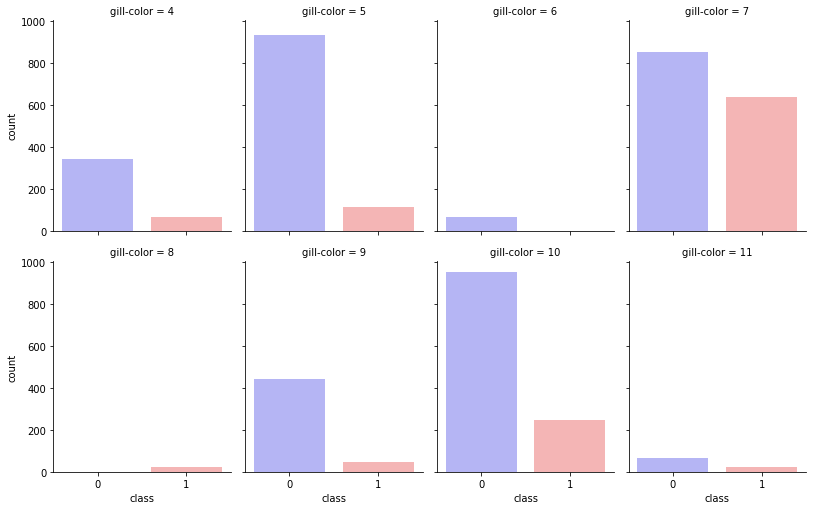

In [42]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=3.5, aspect=.8, col_wrap=4,palette="bwr");
#plt.savefig("gillcolor2.png", format='png', dpi=100, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

Cây quyết định

In [73]:
#Xử lý dữ liệu để vẽ cây quyết định
X_dt = df.drop(['class'], axis=1)  
Y = df["class"]
X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X_dt, Y, random_state=42, test_size=0.3) #train 70% - test 30%

In [74]:
def train_and_test(model, train_data, test_data):
    """
    Trains the model on the training data, prints the score for such model evaluating it on the testing data
    and also returns the learned model
    model: classifier to be used
    train_data: [X_train_dt, Y_train_dt]
    test_data: [X_test_dt, Y_test_dt]
    """
    # Fits the model to the training data 
    model.fit(train_data[0], train_data[1])
    # Evaluates the model using the testing data
    print(model.score(test_data[0], test_data[1]))
    # Returns the fitted model
    return model

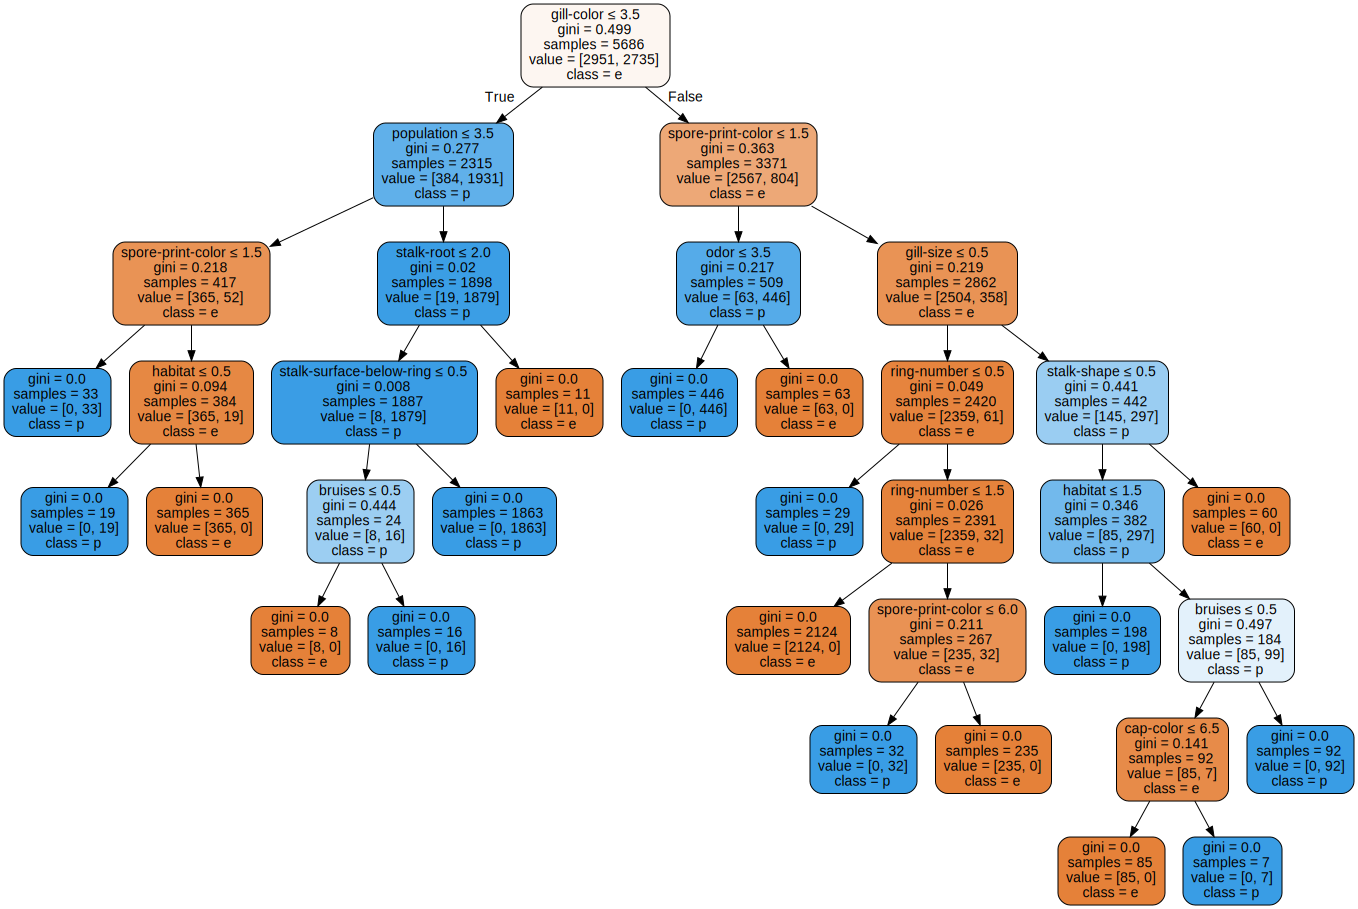

In [75]:
from sklearn.tree import DecisionTreeClassifier as clf
Y_name = ['e','p']
clf = DecisionTreeClassifier()
clf.fit(X_train_dt, Y_train_dt)
Y_pred_dt = clf.predict(X_test_dt)
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_dt.columns,
                         class_names=Y_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render(filename='DecisionTree')
graph

Nhận xét: Nhìn vào cây quyết định của bộ dữ liệu, ta thấy rằng "gill-color" là nút gốc của cây

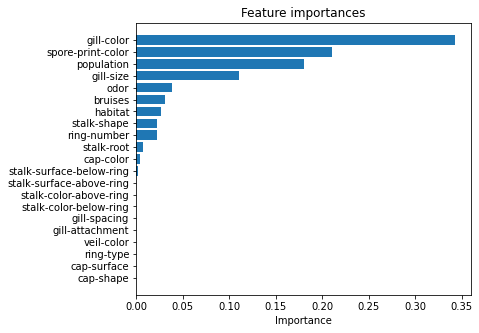

In [76]:
#Visualize biểu đồ thể hiện các đặc tính quan trọng trong bộ dữ liệu Mushrooms
features_list = X_dt.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(6,5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

In [79]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Decision Tree Classifier Report:\n\n{}\n'.format(classification_report(Y_test_dt, Y_pred_dt)))
res = cross_val_score(clf, X_test_dt,Y_test_dt, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_test_dt,clf.predict(X_test_dt))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(clf.score(X_test_dt, Y_test_dt)*100, 2)))

TEST RESULTS:

Decision Tree Classifier Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Average Accuracy:	0.9992

Standard Deviation:	0.0016

Confusion Matrix:
[[1257    0]
 [   0 1181]]

Accuracy Score:		100.0%


Bằng tất cả các phương pháp đã được kiểm tra phía trên. Chúng ta nhận thấy đặc điểm quan trọng nhất là "gill-color"


# Xử lý bộ dữ liệu

In [80]:
X=pd.get_dummies(X_dt,columns=X_dt.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,cap-color_3,cap-color_4,cap-color_5,cap-color_6,cap-color_7,cap-color_8,cap-color_9,bruises_1,odor_1,odor_2,odor_3,odor_4,odor_5,odor_6,odor_7,odor_8,gill-attachment_1,gill-spacing_1,gill-size_1,gill-color_1,gill-color_2,gill-color_3,gill-color_4,gill-color_5,gill-color_6,gill-color_7,gill-color_8,gill-color_9,gill-color_10,gill-color_11,...,stalk-color-above-ring_5,stalk-color-above-ring_6,stalk-color-above-ring_7,stalk-color-above-ring_8,stalk-color-below-ring_1,stalk-color-below-ring_2,stalk-color-below-ring_3,stalk-color-below-ring_4,stalk-color-below-ring_5,stalk-color-below-ring_6,stalk-color-below-ring_7,stalk-color-below-ring_8,veil-color_1,veil-color_2,veil-color_3,ring-number_1,ring-number_2,ring-type_1,ring-type_2,ring-type_3,ring-type_4,spore-print-color_1,spore-print-color_2,spore-print-color_3,spore-print-color_4,spore-print-color_5,spore-print-color_6,spore-print-color_7,spore-print-color_8,population_1,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Chia dữ liệu: 70% training; 30% test

In [81]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Chia dữ liệu thành các nhóm train và test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42) #70% training and 30% test
#Chuẩn hóa tập dữ liệu x_train và x_test
sc = preprocessing.StandardScaler().fit(X_train)
X_scaled = sc.transform(X)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [82]:
print(X_dt)

      cap-shape  cap-surface  cap-color  ...  spore-print-color  population  habitat
0             5            2          4  ...                  2           3        5
1             5            2          9  ...                  3           2        1
2             0            2          8  ...                  3           2        3
3             5            3          8  ...                  2           3        5
4             5            2          3  ...                  3           0        1
...         ...          ...        ...  ...                ...         ...      ...
8119          3            2          4  ...                  0           1        2
8120          5            2          4  ...                  0           4        2
8121          2            2          4  ...                  0           1        2
8122          3            3          4  ...                  7           4        2
8123          5            2          4  ...                  4  

In [83]:
print(X)

      cap-shape_1  cap-shape_2  cap-shape_3  ...  habitat_4  habitat_5  habitat_6
0               0            0            0  ...          0          1          0
1               0            0            0  ...          0          0          0
2               0            0            0  ...          0          0          0
3               0            0            0  ...          0          1          0
4               0            0            0  ...          0          0          0
...           ...          ...          ...  ...        ...        ...        ...
8119            0            0            1  ...          0          0          0
8120            0            0            0  ...          0          0          0
8121            0            1            0  ...          0          0          0
8122            0            0            1  ...          0          0          0
8123            0            0            0  ...          0          0          0

[8124 rows x 95

In [ ]:
#Cột class
print(Y)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64


In [84]:
#PCA giảm chiều dữ liệu
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled) 
X_test_pca = pca.transform(X_test_scaled)

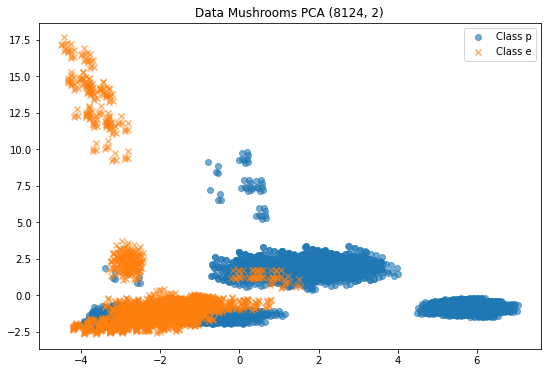

In [85]:
#Visualize mô hình dữ liệu Data Mushrooms bằng PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#X_scaled
X_pca = pca.fit_transform(X_scaled)
e_x = X_pca[(Y==0)]
p_x = X_pca[(Y==1)]

#Visualize mô hình PCA
plt.figure(figsize=(9,6))
plt.title('Data Mushrooms PCA '+ str(X_pca.shape))
plt.scatter(p_x[:,0],p_x[:,1],marker='o',alpha=0.6)
plt.scatter(e_x[:,0],e_x[:,1],marker='x',alpha=0.6)
plt.legend(['Class p','Class e'])
#plt.savefig('data_mushrooms_pca.png', format='png', dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
print("Dữ liệu gốc sau khi xử lý:", X_pca.shape)

Dữ liệu gốc sau khi xử lý: (8124, 2)


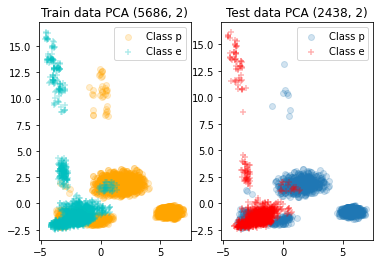

In [86]:
#Visualize 2 mô hình dữ liệu train và test sau khi chuẩn hóa bằng PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#X_train_scaled
e_train = X_train_pca[(Y_train==0)]
p_train = X_train_pca[(Y_train==1)]

#X_test_scaled
e_test = X_test_pca[(Y_test==0)]
p_test = X_test_pca[(Y_test==1)]

#Visualize mô hình PCA
fig, (plttrain, plttest) = plt.subplots(1, 2)
#PCA Train
plttrain.set_title('Train data PCA '+ str(X_train_pca.shape))
plttrain.scatter(p_train[:,0],p_train[:,1],alpha=0.2, color='orange', marker='o')
plttrain.scatter(e_train[:,0],e_train[:,1],alpha=0.3, color='c', marker='+')
plttrain.legend(['Class p','Class e'])
#PCA test data
plttest.set_title('Test data PCA '+ str(X_test_pca.shape))
plttest.scatter(p_test[:,0], p_test[:,1],alpha=0.2, marker='o')
plttest.scatter(e_test[:,0], e_test[:,1],alpha=0.3, color='r', marker='+')
plttest.legend(['Class p','Class e'])
#plt.savefig('train-test_data_pca.png', format='png', dpi=150, bbox_inches='tight')
plt.show()

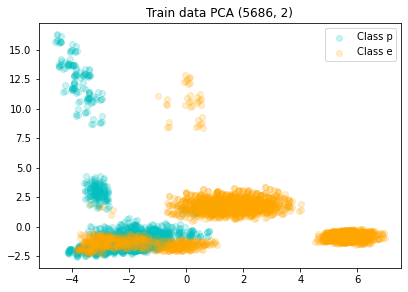

In [87]:
#Visualize mô hình dữ liệu Train Data sau khi chuẩn hóa bằng PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Giảm chiều dữ liệu
e_train = X_train_pca[(Y_train==0)]
p_train = X_train_pca[(Y_train==1)]

#Visualize mô hình 
plt.figure(figsize=(6.5,4.5))
plt.title('Train data PCA '+ str(X_train_pca.shape))
plt.scatter(e_train[:, 0], e_train[:, 1], color='c', alpha=0.2)
plt.scatter(p_train[:, 0], p_train[:, 1], color='orange', alpha=0.2)
plt.legend(['Class p','Class e'])
#plt.savefig('train_data_pca.png', format='png', dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
print("Dữ liệu đào tạo sau khi chuẩn hóa:", X_train_pca.shape)

Dữ liệu đào tạo sau khi chuẩn hóa: (5686, 2)


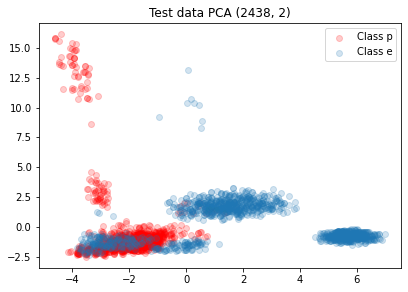

In [88]:
#Visualize mô hình dữ liệu Test Data sau khi chuẩn hóa bằng PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Giảm chiều dữ liệu
e_test = X_test_pca[(Y_test==0)]
p_test = X_test_pca[(Y_test==1)]

#Visualize mô hình PCA
plt.figure(figsize=(6.5,4.5))
plt.title('Test data PCA '+ str(X_test_pca.shape))
plt.scatter(e_test[:, 0], e_test[:, 1],color='r', alpha=0.2)
plt.scatter(p_test[:, 0], p_test[:, 1], alpha=0.2)
plt.legend(['Class p','Class e'])
#plt.savefig('test_data_pca.png', format='png', dpi=100, bbox_inches='tight')
plt.show()

In [62]:
print("Dữ liệu thử nghiệm sau khi chuẩn hóa:", X_test_pca.shape)

Dữ liệu thử nghiệm sau khi chuẩn hóa: (2438, 2)


Đối với bộ dữ liệu phân loại nấm, nhóm chúng em đã chọn một số thuật toán phân loại đã học để tính toán và phân tích. Chúng em đã sử dụng các thư viện của trình phân loại trong Python và giải thích cách hoạt động của nó.

Bước tiếp theo, ta tiến hành xây dựng model để dự đoán và ước tính kết quả

# Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier as DT
dt = DT(criterion='entropy',random_state=42)
dt.fit(X_train_pca, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [90]:
Y_pred_dt = dt.predict(X_test_pca)

In [91]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Decision Tree Classifier Report:\n\n{}\n'.format(classification_report(Y_test, Y_pred_dt)))
res = cross_val_score(dt, X_test_pca, Y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_test,dt.predict(X_test_pca))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(dt.score(X_test_pca, Y_test)*100, 2)))


TEST RESULTS:

Decision Tree Classifier Report:

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1257
           1       0.91      0.89      0.90      1181

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90      2438
weighted avg       0.90      0.90      0.90      2438


Average Accuracy:	0.8831

Standard Deviation:	0.0095

Confusion Matrix:
[[1151  106]
 [ 132 1049]]

Accuracy Score:		90.24%


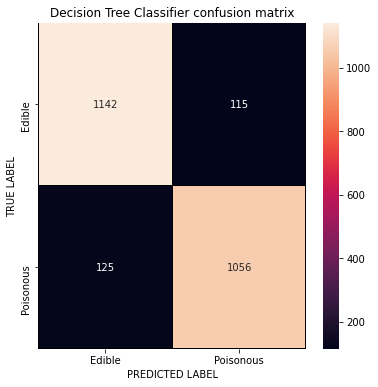

In [ ]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_dt = confusion_matrix(Y_test, Y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_dt, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
plt.savefig("dtcm.png", format='png', dpi=150, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

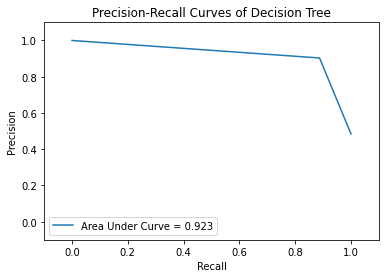

In [ ]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_dt)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("dtpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


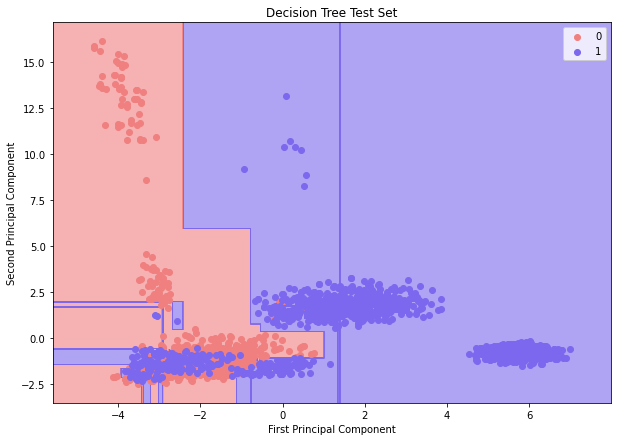

In [ ]:
#Visualize mô hình Decision Tree Test Set
#dt_pca = DT()
#dt_pca.fit(X_train_pca,Y_train)

plt.figure(figsize=(10,7))
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test_pca, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dt.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Decision Tree Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
#plt.savefig("dt_pci_test.png", format='png', dpi=100, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

# Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB as NB
nb = NB()
nb.fit(X_train_pca,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Y_pred_nb = nb.predict(X_test_pca)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Naïve Bayes Classifier report:\n\n{}\n'.format(classification_report(Y_test, Y_pred_nb)))
res = cross_val_score(nb, X_test_pca, Y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_test,nb.predict(X_test_pca))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(nb.score(X_test_pca, Y_test)*100, 2)))

TEST RESULTS:

Naïve Bayes Classifier report:

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1257
           1       0.96      0.82      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.89      0.90      2438
weighted avg       0.90      0.90      0.90      2438


Average Accuracy:	0.8954

Standard Deviation:	0.0181

Confusion Matrix:
[[1215   42]
 [ 210  971]]

Accuracy Score:		89.66%


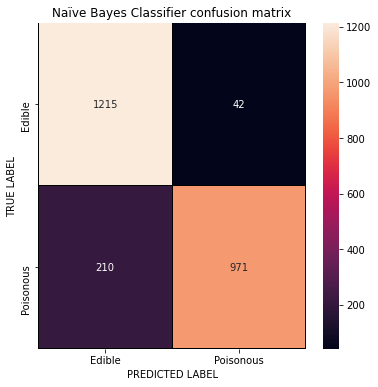

In [ ]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_nb = confusion_matrix(Y_test, Y_pred_nb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_nb, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Naïve Bayes Classifier confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
#plt.savefig("nbcm.png", format='png', dpi=150, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

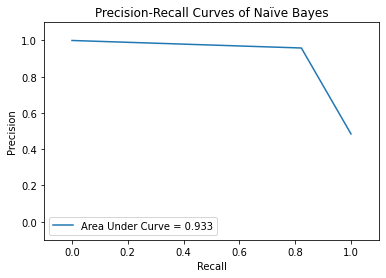

In [ ]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_nb)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Naïve Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("nbpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


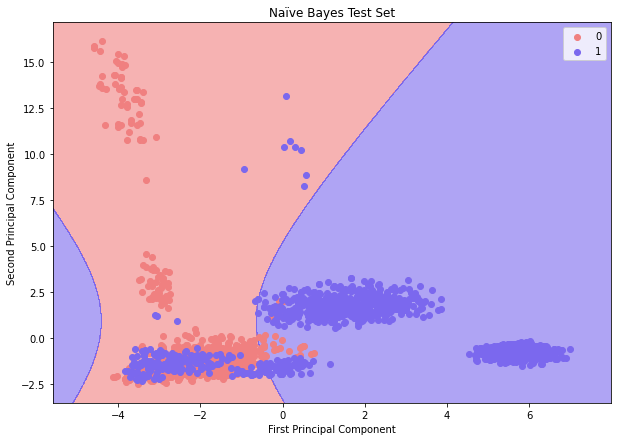

In [ ]:
#Visualize mô hình Naïve Bayes Test Set
#nb_pca = NB()
#nb_pca.fit(X_train_pca,Y_train)

plt.figure(figsize=(10,7))
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test_pca, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Naïve Bayes Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
#plt.savefig("nb_pci_test.png", format='png', dpi=100, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
rf = RF(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf.fit(X_train_pca, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
Y_pred_rf = rf.predict(X_test_pca)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Random Forest Classifier report:\n\n{}\n'.format(classification_report(Y_test, Y_pred_rf)))
res = cross_val_score(rf, X_test_pca, Y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_test,rf.predict(X_test_pca))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(rf.score(X_test_pca, Y_test)*100, 2)))

TEST RESULTS:

Random Forest Classifier report:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1257
           1       0.96      0.90      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Average Accuracy:	0.9212

Standard Deviation:	0.0124

Confusion Matrix:
[[1214   43]
 [ 123 1058]]

Accuracy Score:		93.19%


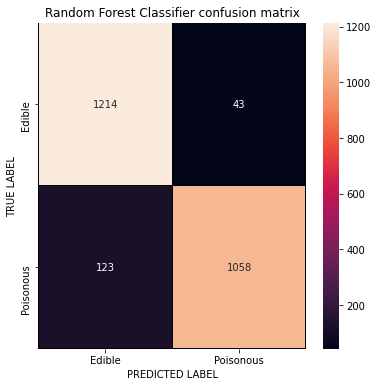

In [ ]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_rf = confusion_matrix(Y_test, Y_pred_rf)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_rf, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Random Forest Classifier confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
#plt.savefig("rfcm.png", format='png', dpi=150, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

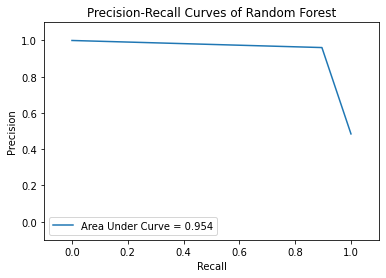

In [ ]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_rf)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("rfpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


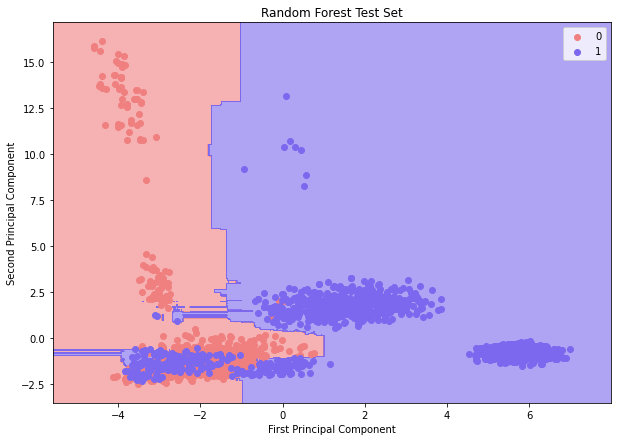

In [ ]:
#Visualize mô hình Random Forest Classifier Test Set
#rf_pca = RF()
#rf_pca.fit(X_train_pca,Y_train)

plt.figure(figsize=(10,7))
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test_pca, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Random Forest Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
#plt.savefig("rf_pci_test.png", format='png', dpi=100, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

# Support Vector Machines

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto", probability=True)
svm.fit(X_train_pca,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
Y_pred_svm = svm.predict(X_test_pca)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Support Vector Machines report:\n\n{}\n'.format(classification_report(Y_test, Y_pred_svm)))
res = cross_val_score(svm, X_test_pca, Y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_test,svm.predict(X_test_pca))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(svm.score(X_test_pca, Y_test)*100, 2)))

TEST RESULTS:

Support Vector Machines report:

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1257
           1       0.98      0.87      0.92      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.92      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Average Accuracy:	0.9221

Standard Deviation:	0.0119

Confusion Matrix:
[[1232   25]
 [ 156 1025]]

Accuracy Score:		92.58%


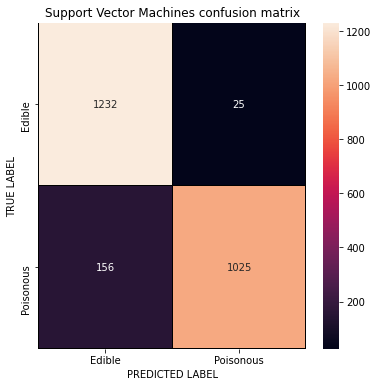

In [ ]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_svm = confusion_matrix(Y_test, Y_pred_svm)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_svm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Support Vector Machines confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
#plt.savefig("svmcm.png", format='png', dpi=150, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

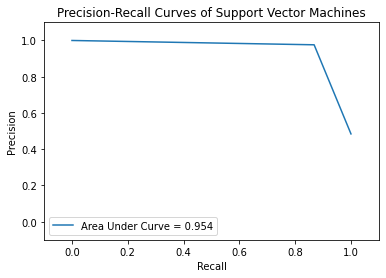

In [ ]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_svm)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Support Vector Machines')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("svmpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


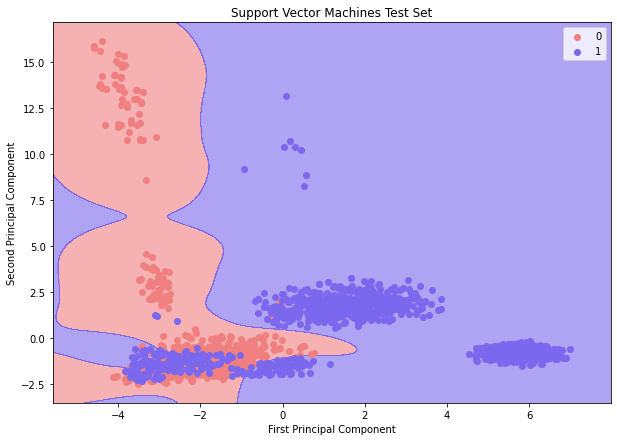

In [ ]:
#Visualize mô hình Support Vector Machines Test Set
#svm_pca = SVC()
#svm_pca.fit(X_train_pca,Y_train)

plt.figure(figsize=(10,7))
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test_pca, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("Support Vector Machines Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
#plt.savefig("svm_pci_test.png", format='png', dpi=100, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN()
knn.fit(X_train_pca,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
Y_pred_knn = knn.predict(X_test_pca)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('K-Nearest Neighbors report:\n\n{}\n'.format(classification_report(Y_test, Y_pred_knn)))
res = cross_val_score(knn, X_test_pca, Y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_test,knn.predict(X_test_pca))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(knn.score(X_test_pca, Y_test)*100, 2)))

TEST RESULTS:

K-Nearest Neighbors report:

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1257
           1       0.96      0.90      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Average Accuracy:	0.9245

Standard Deviation:	0.0059

Confusion Matrix:
[[1211   46]
 [ 124 1057]]

Accuracy Score:		93.03%


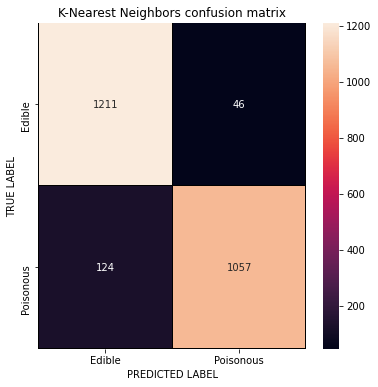

In [ ]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_knn = confusion_matrix(Y_test, Y_pred_knn)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_knn, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('K-Nearest Neighbors confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
#plt.savefig("knncm.png", format='png', dpi=150, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

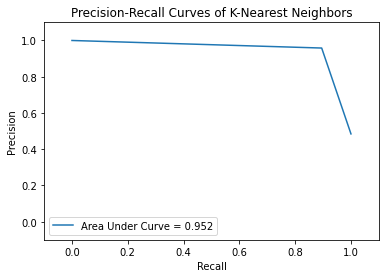

In [ ]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_knn)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of K-Nearest Neighbors')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("knnpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


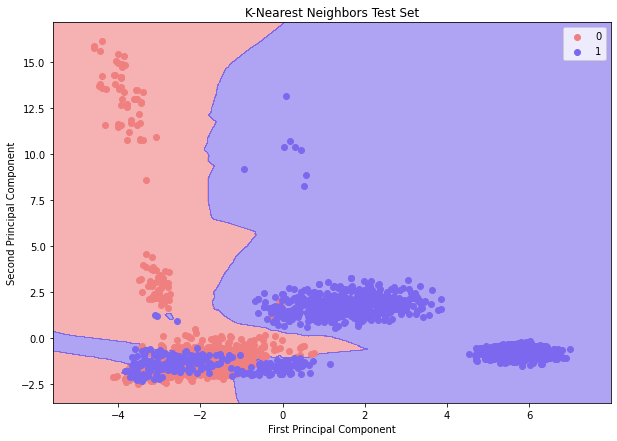

In [ ]:
#Visualize mô hình K-Nearest Neighbors Test Set
#knn_pca = KNN()
#knn_pca.fit(X_train_pca,Y_train)

plt.figure(figsize=(10,7))
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test_pca, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('lightcoral', 'mediumslateblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('lightcoral', 'mediumslateblue'))(i), label = j)
plt.title("K-Nearest Neighbors Test Set")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
#plt.savefig("knn_pci_test.png", format='png', dpi=100, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

# ROC Curves

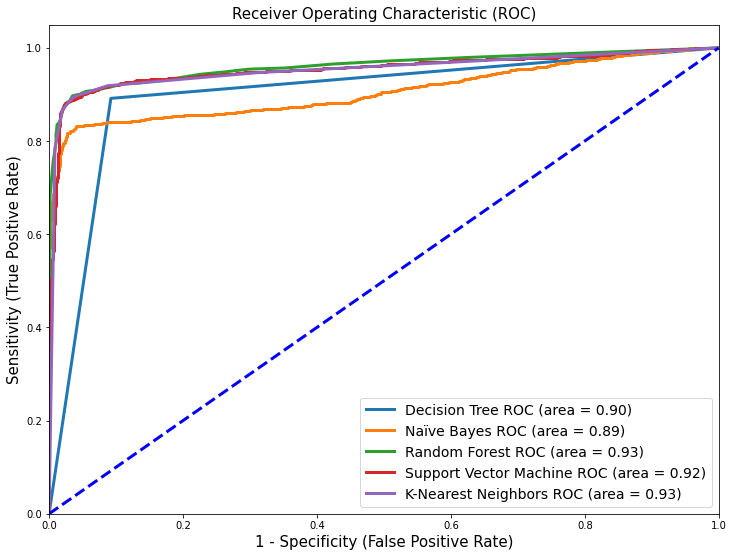

In [ ]:
#Visualize mô hình ROC (Receiver Operating Characteristic) Curves - so sánh trực quan các mô hình phân loại
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

plt.figure(figsize=(12,9))
models = [
{
    'label': 'Decision Tree',
    'model': dt,
},
{
    'label': 'Naïve Bayes',
    'model': nb,
},
{
    'label': 'Random Forest',
    'model': rf,
},
{
    'label': 'Support Vector Machine',
    'model': svm,
},
{
    'label': 'K-Nearest Neighbors',
    'model': knn,
}
]

for m in models:
    model = m['model'] 
    model.fit(X_train_pca, Y_train) 
    y_pred=model.predict(X_test_pca) 
    fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test_pca)[:,1])
    auc = roc_auc_score(Y_test,model.predict(X_test_pca))
    plt.plot(fpr, tpr, linestyle='-', linewidth=3, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'b--', linewidth=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=14)
#plt.savefig("roc_curves.png", format='png', dpi=100, bbox_inches='tight')
plt.show()